**Scraping e analisi nae_vegan**

In [3]:
import requests

In [5]:
base_url = "https://nae-vegan.com/"
list_details_w = "it-it/collections/scarpe-donna"
list_url_w = base_url + list_details_w

print(list_url_w)

https://nae-vegan.com/it-it/collections/scarpe-donna


In [7]:
headers = {"User-Agent":"Chrome/128.0"}
req_w = requests.get(list_url_w, headers=headers)
print(req_w)

<Response [200]>


In [9]:
from bs4 import BeautifulSoup

In [11]:
soup_w = BeautifulSoup(req_w.text)
#print(soup_w) 

In [13]:
#nome_prodotto_w = soup_w.find_all("h3", class_="card__heading h5")
#nome_prodotto_w

#restituisce un numero limitato per pagina, serve selenium

In [15]:
!pip install selenium

In [74]:
!pip install webdriver_manager

In [15]:
import requests
from bs4 import BeautifulSoup

headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

# URL che carica i prodotti extra
url = "https://nae-vegan.com/it-it/collections/scarpe-donna?view=load-more&page={}"

nome_prodotto_w = []

# Prova 1–10 pagine finché non ne arrivano più
for page in range(1, 15):
    full_url = url.format(page)
    r = requests.get(full_url, headers=headers)
    
    if r.status_code != 200 or not r.text.strip():
        break  # stop se la risposta è vuota
    
    soup = BeautifulSoup(r.text, "html.parser")
    prodotti = soup.find_all("h3", class_="card__heading h5")
    
    if not prodotti:
        break
    
    for p in prodotti:
        nome = p.text.strip()
        if nome:
            nome_prodotto_w.append(nome)

# Rimuovi duplicati mantenendo l'ordine
nome_prodotto_w = list(dict.fromkeys(nome_prodotto_w))

print(f" Prodotti trovati: {len(nome_prodotto_w)}")
print(nome_prodotto_w[:20])


 Prodotti trovati: 127
['OKINA Black', 'OKINA Green', 'TONGA Black', 'TONGA Green', 'DAVU Black', 'DAVU Green', 'LAU Black', 'LAU Green', 'TUPAI Black', 'TUPAI Green', 'TANNA Black', 'TANNA Green', 'DESA Brown', 'MINA Black', 'LISA Black', 'DIANA Black', 'DIANA Beige', 'ADEL Beige', 'JAQUE Beige', 'ANGE Brown']


In [17]:
import requests
from bs4 import BeautifulSoup

headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

# URL che carica i prodotti extra
url = "https://nae-vegan.com/it-it/collections/shoes-men-all?view=load-more&page={}"

nome_prodotto_m = []

# Prova 1–10 pagine finché non ne arrivano più
for page in range(1, 15):
    full_url = url.format(page)
    r = requests.get(full_url, headers=headers)
    
    if r.status_code != 200 or not r.text.strip():
        break  # stop se la risposta è vuota
    
    soup = BeautifulSoup(r.text, "html.parser")
    prodotti = soup.find_all("h3", class_="card__heading h5")
    
    if not prodotti:
        break
    
    for p in prodotti:
        nome = p.text.strip()
        if nome:
            nome_prodotto_m.append(nome)

# Rimuovi duplicati mantenendo l'ordine
nome_prodotto_m = list(dict.fromkeys(nome_prodotto_m))

print(f" Prodotti trovati: {len(nome_prodotto_m)}")
print(nome_prodotto_m[:20])


 Prodotti trovati: 75
['OKINA Green', 'OKINA Black', 'TONGA Black', 'TONGA Green', 'DAVU Black', 'DAVU Green', 'LAU Black', 'LAU Green', 'TUPAI Black', 'TUPAI Green', 'TANNA Black', 'TANNA Green', 'Mikel Brown', 'Mikel and Bruc Brown', 'Mikel Black', 'JAKE Brown', 'JAKE Black', 'JAKE CORK Brown', 'Jake and Begur Black', 'DARIO Black']


In [19]:
import requests
from bs4 import BeautifulSoup

headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

url = "https://nae-vegan.com/it-it/collections/scarpe-donna?view=load-more&page={}"

prezzi_dict = {}

for page in range(1, 15):
    response = requests.get(url.format(page), headers=headers)
    if response.status_code != 200 or not response.text.strip():
        break

    soup = BeautifulSoup(response.text, "html.parser")
    prodotti = soup.find_all("div", class_="card-wrapper")

    for prodotto in prodotti:
        nome_tag = prodotto.find("h3", class_="card__heading")
        nome = nome_tag.text.strip() if nome_tag else None

        # Trova tutti i tag prezzo visibili (sia <s> che <span>)
        prezzo_tags = prodotto.find_all(["span", "s"], class_="price-item")

        prezzi = []
        for tag in prezzo_tags:
            prezzo_text = tag.text.strip().replace("€", "").replace(",", ".")
            try:
                prezzo_float = float(prezzo_text)
                prezzi.append(prezzo_float)
            except:
                continue

        if nome and prezzi:
            prezzo_max = max(prezzi)
            prezzi_dict[nome] = f"€{prezzo_max:.2f}".replace(".", ",")  # formato europeo

# Lista finale
prezzi_prodotti_w = list(prezzi_dict.values())

print(f"✅ Prezzi massimi trovati: {len(prezzi_prodotti_w)}")
print(prezzi_prodotti_w[:10])


✅ Prezzi massimi trovati: 127
['€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€85,00', '€85,00']


In [21]:
import requests
from bs4 import BeautifulSoup

headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

url = "https://nae-vegan.com/it-it/collections/shoes-men-all?view=load-more&page={}"

prezzi_dict = {}

for page in range(1, 15):
    response = requests.get(url.format(page), headers=headers)
    if response.status_code != 200 or not response.text.strip():
        break

    soup = BeautifulSoup(response.text, "html.parser")
    prodotti = soup.find_all("div", class_="card-wrapper")

    for prodotto in prodotti:
        nome_tag = prodotto.find("h3", class_="card__heading")
        nome = nome_tag.text.strip() if nome_tag else None

        # Trova tutti i tag prezzo visibili (sia <s> che <span>)
        prezzo_tags = prodotto.find_all(["span", "s"], class_="price-item")

        prezzi = []
        for tag in prezzo_tags:
            prezzo_text = tag.text.strip().replace("€", "").replace(",", ".")
            try:
                prezzo_float = float(prezzo_text)
                prezzi.append(prezzo_float)
            except:
                continue

        if nome and prezzi:
            prezzo_max = max(prezzi)
            prezzi_dict[nome] = f"€{prezzo_max:.2f}".replace(".", ",")  # formato europeo

# Lista finale
prezzi_prodotti_m = list(prezzi_dict.values())

print(f"✅ Prezzi massimi trovati: {len(prezzi_prodotti_m)}")
print(prezzi_prodotti_m[:10])


✅ Prezzi massimi trovati: 75
['€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€85,00', '€85,00']


In [23]:
print(nome_prodotto_w)

['OKINA Black', 'OKINA Green', 'TONGA Black', 'TONGA Green', 'DAVU Black', 'DAVU Green', 'LAU Black', 'LAU Green', 'TUPAI Black', 'TUPAI Green', 'TANNA Black', 'TANNA Green', 'DESA Brown', 'MINA Black', 'LISA Black', 'DIANA Black', 'DIANA Beige', 'ADEL Beige', 'JAQUE Beige', 'ANGE Brown', 'AURE Black', 'BASIL Black', 'BASIL Red', 'CORA CORK Brown', 'CORA MICRO Black', 'CORA PINATEX Red', 'DEVAN Black', 'ESTELA Red', 'Finna Black', 'FLORA CORK Brown', 'HEBEA Black', 'HOLLY Black', 'HOLLY Orange', 'IRIS Black', 'IRIS Orange', 'Isia Black', 'JUNO Black', 'MARA Black', 'MARGOT CORK Brown', 'MARIA Brown', 'NERAD Beige', 'OLGA Black', 'PAX Beige', 'ROMA Black', 'ZINNIA Black', 'SAMET Black', 'SAMET Green', 'MAK Black', 'PODA Black', 'LANTA Black', 'Loto Grey', 'LIPE Black', 'QUINCE Black', 'SAMUI Green', 'TEA White', 'PETA Black', 'PAM Black', 'PAM Beige', 'Pam and Batea Beige', 'OBE Black', 'RODA Black', 'MOE Black', 'Moe and Mura Black', 'ELENA Black', 'DEME Black', 'MELITA Black', 'MELITA

In [25]:
print(nome_prodotto_m)

['OKINA Green', 'OKINA Black', 'TONGA Black', 'TONGA Green', 'DAVU Black', 'DAVU Green', 'LAU Black', 'LAU Green', 'TUPAI Black', 'TUPAI Green', 'TANNA Black', 'TANNA Green', 'Mikel Brown', 'Mikel and Bruc Brown', 'Mikel Black', 'JAKE Brown', 'JAKE Black', 'JAKE CORK Brown', 'Jake and Begur Black', 'DARIO Black', 'DARIO Beige', 'LUKE Beige', 'LUKE Brown', 'MILES Black', 'EMIL Brown', 'EDU Brown', 'HECTOR Black', 'NOLAN Brown', 'Adrien Beige', 'ARUM Beige', 'ARUM Grey', 'THYME Black', 'TANGO Brown', 'SIRO Black', 'BERLIN Green', 'Berlin Green + Kit di pulizia', 'BERLIN Red', 'BERLIN White', 'LONDON Green', 'LONDON Red', 'KOMO Green', 'KOMO White', 'Clove Black', 'HADE Grey', 'JOR Black', 'JOR White', 'JOR Blue', 'Clove Red', 'REDO Black', 'REDO Grey', 'SAMET Black', 'SAMET Green', 'SAMUI Green', 'MAK Black', 'Loto Grey', 'PODA Black', 'AGUS Grey', 'AGUS Brown', 'BASTI Black', 'BASTI Brown', 'Basti Brown and Belt Mila', 'ADAR Green', 'ADAR Grey', 'CASIAN Brown', 'EBAN Green', 'FABER Blac

In [27]:
print(prezzi_prodotti_w)

['€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€85,00', '€85,00', '€85,00', '€85,00', '€110,00', '€115,00', '€115,00', '€110,00', '€110,00', '€120,00', '€95,00', '€125,00', '€99,00', '€99,00', '€99,00', '€105,00', '€105,00', '€105,00', '€120,00', '€119,00', '€99,00', '€118,00', '€105,00', '€99,00', '€99,00', '€110,00', '€110,00', '€85,00', '€110,00', '€120,00', '€110,00', '€125,00', '€120,00', '€115,00', '€110,00', '€105,00', '€110,00', '€85,00', '€85,00', '€85,00', '€85,00', '€85,00', '€85,00', '€85,00', '€68,00', '€85,00', '€165,00', '€145,00', '€99,00', '€99,00', '€139,00', '€135,00', '€135,00', '€125,00', '€150,00', '€128,00', '€99,00', '€110,00', '€110,00', '€110,00', '€110,00', '€135,00', '€125,00', '€128,00', '€128,00', '€110,00', '€115,00', '€110,00', '€115,00', '€115,00', '€115,00', '€128,00', '€120,00', '€120,00', '€105,00', '€105,00', '€135,00', '€135,00', '€99,00', '€99,00', '€99,00', '€99,00', '€125,00', '€149,00', '€125,00', '€12

In [29]:
print(prezzi_prodotti_m)

['€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€110,00', '€85,00', '€85,00', '€85,00', '€85,00', '€135,00', '€150,00', '€135,00', '€149,00', '€149,00', '€149,00', '€162,00', '€138,00', '€138,00', '€138,00', '€138,00', '€128,00', '€135,00', '€135,00', '€155,00', '€135,00', '€135,00', '€120,00', '€120,00', '€135,00', '€128,00', '€145,00', '€125,00', '€149,00', '€125,00', '€125,00', '€135,00', '€135,00', '€99,00', '€99,00', '€99,00', '€99,00', '€99,00', '€99,00', '€99,00', '€99,00', '€75,00', '€75,00', '€85,00', '€85,00', '€85,00', '€85,00', '€85,00', '€85,00', '€125,00', '€125,00', '€135,00', '€135,00', '€153,00', '€135,00', '€135,00', '€145,00', '€135,00', '€135,00', '€135,00', '€145,00', '€145,00', '€140,00', '€135,00', '€135,00', '€125,00', '€138,00', '€135,00']


In [31]:
colori_prodotti_w = []

for nome in nome_prodotto_w :
    ultima_parola = nome.split()[-1]
    colori_prodotti_w.append(ultima_parola)



In [33]:
colori_prodotti_m = []

for nome in nome_prodotto_m :
    ultima_parola = nome.split()[-1]
    colori_prodotti_m.append(ultima_parola)



In [255]:
print(colori_prodotti_w)

['Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Brown', 'Black', 'Black', 'Black', 'Beige', 'Beige', 'Beige', 'Brown', 'Black', 'Black', 'Red', 'Brown', 'Black', 'Red', 'Black', 'Red', 'Black', 'Brown', 'Black', 'Black', 'Orange', 'Black', 'Orange', 'Black', 'Black', 'Black', 'Brown', 'Brown', 'Beige', 'Black', 'Beige', 'Black', 'Black', 'Black', 'Green', 'Black', 'Black', 'Black', 'Grey', 'Black', 'Black', 'Green', 'White', 'Black', 'Black', 'Beige', 'Beige', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Green', 'Red', 'Brown', 'Black', 'Black', 'Brown', 'Black', 'Brown', 'White', 'Brown', 'Black', 'Black', 'Beige', 'Brown', 'Beige', 'Grey', 'Black', 'White', 'Beige', 'Black', 'Grey', 'Black', 'Blue', 'White', 'Green', 'pulizia', 'Red', 'White', 'Green', 'Red', 'Pink', 'White', 'Green', 'White', 'Red', 'Black', 'Black', 'Grey', 'Brown', 'Black', 'Black', 'Brown', 'Black', 'Black', 'Black', 'Black', 'Black'

In [257]:
print(colori_prodotti_m)

['Green', 'Black', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Brown', 'Brown', 'Black', 'Brown', 'Black', 'Brown', 'Black', 'Black', 'Beige', 'Beige', 'Brown', 'Black', 'Brown', 'Brown', 'Black', 'Brown', 'Beige', 'Beige', 'Grey', 'Black', 'Brown', 'Black', 'Green', 'pulizia', 'Red', 'White', 'Green', 'Red', 'Green', 'White', 'Black', 'Grey', 'Black', 'White', 'Blue', 'Red', 'Black', 'Grey', 'Black', 'Green', 'Green', 'Black', 'Grey', 'Black', 'Grey', 'Brown', 'Black', 'Brown', 'Mila', 'Green', 'Grey', 'Brown', 'Green', 'Black', 'Brown', 'Black', 'Brown', 'Brown', 'Black', 'Brown', 'White', 'Black', 'Black']


In [279]:
for i in range(len(colori_prodotti_w)):
    if colori_prodotti_w[i] == "pulizia":
        colori_prodotti_w[i] = "Black"

In [283]:
print(colori_prodotti_w)

['Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Brown', 'Black', 'Black', 'Black', 'Beige', 'Beige', 'Beige', 'Brown', 'Black', 'Black', 'Red', 'Brown', 'Black', 'Red', 'Black', 'Red', 'Black', 'Brown', 'Black', 'Black', 'Orange', 'Black', 'Orange', 'Black', 'Black', 'Black', 'Brown', 'Brown', 'Beige', 'Black', 'Beige', 'Black', 'Black', 'Black', 'Green', 'Black', 'Black', 'Black', 'Grey', 'Black', 'Black', 'Green', 'White', 'Black', 'Black', 'Beige', 'Beige', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Green', 'Red', 'Brown', 'Black', 'Black', 'Brown', 'Black', 'Brown', 'White', 'Brown', 'Black', 'Black', 'Beige', 'Brown', 'Beige', 'Grey', 'Black', 'White', 'Beige', 'Black', 'Grey', 'Black', 'Blue', 'White', 'Green', 'Black', 'Red', 'White', 'Green', 'Red', 'Pink', 'White', 'Green', 'White', 'Red', 'Black', 'Black', 'Grey', 'Brown', 'Black', 'Black', 'Brown', 'Black', 'Black', 'Black', 'Black', 'Black', 

In [281]:
for i in range(len(colori_prodotti_m)):
    if colori_prodotti_m[i] == "pulizia":
        colori_prodotti_m[i] = "Black"

In [285]:
print(colori_prodotti_m)

['Green', 'Black', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Black', 'Green', 'Brown', 'Brown', 'Black', 'Brown', 'Black', 'Brown', 'Black', 'Black', 'Beige', 'Beige', 'Brown', 'Black', 'Brown', 'Brown', 'Black', 'Brown', 'Beige', 'Beige', 'Grey', 'Black', 'Brown', 'Black', 'Green', 'Black', 'Red', 'White', 'Green', 'Red', 'Green', 'White', 'Black', 'Grey', 'Black', 'White', 'Blue', 'Red', 'Black', 'Grey', 'Black', 'Green', 'Green', 'Black', 'Grey', 'Black', 'Grey', 'Brown', 'Black', 'Brown', 'Mila', 'Green', 'Grey', 'Brown', 'Green', 'Black', 'Brown', 'Black', 'Brown', 'Brown', 'Black', 'Brown', 'White', 'Black', 'Black']


In [208]:
import requests
from bs4 import BeautifulSoup

base_url = "https://nae-vegan.com"
headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

url = "https://nae-vegan.com/it-it/collections/scarpe-donna?view=load-more&page={}"

# Liste finali
nome_prodotto_w = []
link_prodotti = []

# Richiesta paginata
for page in range(1, 15):
    response = requests.get(url.format(page), headers=headers)
    if response.status_code != 200 or not response.text.strip():
        break

    soup = BeautifulSoup(response.text, "html.parser")
    prodotti = soup.find_all("div", class_="card-wrapper")

    if not prodotti:
        break

    for prodotto in prodotti:
        # Nome
        nome_tag = prodotto.find("h3", class_="card__heading")
        nome = nome_tag.text.strip() if nome_tag else None

        # Link
        link_tag = prodotto.find("a", class_="full-unstyled-link")
        href = link_tag.get("href") if link_tag else None

        if nome and href and "/products/" in href:
            full_link = base_url + href
            nome_prodotto_w.append(nome)
            link_prodotti.append(full_link)

# Risultato
print(f"🔗 Link trovati: {len(link_prodotti)}")
print(link_prodotti[:5])


🔗 Link trovati: 127
['https://nae-vegan.com/it-it/products/okina_black_vegan_sandals', 'https://nae-vegan.com/it-it/products/okina_green_vegan_sandals', 'https://nae-vegan.com/it-it/products/tonga_black_vegan_sandals', 'https://nae-vegan.com/it-it/products/tonga_green_vegan_sandals', 'https://nae-vegan.com/it-it/products/davu_nera_sandali_vegani']


In [41]:
import requests
from bs4 import BeautifulSoup

base_url = "https://nae-vegan.com"
headers = {
    "X-Requested-With": "XMLHttpRequest",
    "User-Agent": "Mozilla/5.0"
}

url = "https://nae-vegan.com/it-it/collections/shoes-men-all?view=load-more&page={}"

# Liste finali
nome_prodotto_m = []
link_prodotti_m = []

# Richiesta paginata
for page in range(1, 15):
    response = requests.get(url.format(page), headers=headers)
    if response.status_code != 200 or not response.text.strip():
        break

    soup = BeautifulSoup(response.text, "html.parser")
    prodotti = soup.find_all("div", class_="card-wrapper")

    if not prodotti:
        break

    for prodotto in prodotti:
        # Nome
        nome_tag = prodotto.find("h3", class_="card__heading")
        nome = nome_tag.text.strip() if nome_tag else None

        # Link
        link_tag = prodotto.find("a", class_="full-unstyled-link")
        href = link_tag.get("href") if link_tag else None

        if nome and href and "/products/" in href:
            full_link = base_url + href
            nome_prodotto_m.append(nome)
            link_prodotti_m.append(full_link)

# Risultato
print(f"🔗 Link trovati: {len(link_prodotti_m)}")
print(link_prodotti_m[:5])


🔗 Link trovati: 75
['https://nae-vegan.com/it-it/products/okina_green_vegan_sandals', 'https://nae-vegan.com/it-it/products/okina_black_vegan_sandals', 'https://nae-vegan.com/it-it/products/tonga_black_vegan_sandals', 'https://nae-vegan.com/it-it/products/tonga_green_vegan_sandals', 'https://nae-vegan.com/it-it/products/davu_nera_sandali_vegani']


In [43]:
headers = {"User-Agent":"Chrome/128.0"}

for link_prodotto in link_prodotti: 
    req_into = requests.get(link_prodotto, headers=headers)
    #print(req_into)

In [44]:
soup_into = BeautifulSoup(req_into.text)

In [389]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

# Setup driver headless (niente finestra)
options = Options()
options.add_argument("--headless")
options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

taglie_prodotti_w = []

for link in link_prodotti:
    driver.get(link)
    time.sleep(2)  # Attendi caricamento JS

    try:
        # Cerca tutti i bottoni delle taglie (che contengono il testo "36", "37", ecc.)
        taglie_elements = driver.find_elements(By.CSS_SELECTOR, "fieldset.product-form__input input[type='radio']")
        taglie = [el.get_attribute("value") for el in taglie_elements if el.get_attribute("value")]
        
        taglie_prodotti_w.append(taglie if taglie else ["N/D"])
    except Exception as e:
        taglie_prodotti_w.append(["N/D"])

driver.quit()

print(f"✅ Taglie trovate per {len(taglie_prodotti_w)} prodotti")
print(taglie_prodotti_w[:5])


✅ Taglie trovate per 127 prodotti
[['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']]


In [391]:
# Setup driver headless (niente finestra)
options = Options()
options.add_argument("--headless")
options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

taglie_prodotti_m = []

for link in link_prodotti_m:
    driver.get(link)
    time.sleep(2)  # Attendi caricamento JS

    try:
        # Cerca tutti i bottoni delle taglie (che contengono il testo "36", "37", ecc.)
        taglie_elements = driver.find_elements(By.CSS_SELECTOR, "fieldset.product-form__input input[type='radio']")
        taglie = [el.get_attribute("value") for el in taglie_elements if el.get_attribute("value")]
        
        taglie_prodotti_m.append(taglie if taglie else ["N/D"])
    except Exception as e:
        taglie_prodotti_m.append(["N/D"])

driver.quit()

print(f"✅ Taglie trovate per {len(taglie_prodotti_m)} prodotti")
print(taglie_prodotti_m[:5])


✅ Taglie trovate per 75 prodotti
[['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'], ['36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']]


In [452]:
taglie_prodotti_w = [
    [valore for valore in elemento if "/" not in valore]
    for elemento in taglie_prodotti_w
]

    

In [458]:
taglie_prodotti_m = [
    [valore for valore in elemento if "/" not in valore]
    for elemento in taglie_prodotti_m
]

In [507]:
taglie_prodotti_m = [list(dict.fromkeys(sottolista)) for sottolista in taglie_prodotti_m]

In [509]:
taglie_prodotti_w = [list(dict.fromkeys(sottolista)) for sottolista in taglie_prodotti_w]

In [511]:
range_taglie_w = []

for taglie in taglie_prodotti_w:
    if taglie != ["N/D"]:
        if len(taglie) >= 2:
            range_taglie_w.append(f"{taglie[0]} - {taglie[-1]}")
        elif len(taglie) == 1:
            range_taglie_w.append(f"{taglie[0]} - {taglie[0]}")
        else:
            range_taglie_w.append("N/D")
    else:
        range_taglie_w.append("N/D")

print(range_taglie_w[:5])


['36 - 46', '36 - 46', '36 - 46', '36 - 46', '36 - 46']


In [513]:
range_taglie_m = []

for taglie in taglie_prodotti_m:
    if taglie != ["N/D"]:
        if len(taglie) >= 2:
            range_taglie_m.append(f"{taglie[0]} - {taglie[-1]}")
        elif len(taglie) == 1:
            range_taglie_m.append(f"{taglie[0]} - {taglie[0]}")
        else:
            range_taglie_m.append("N/D")
    else:
        range_taglie_m.append("N/D")

print(range_taglie_m[:5])


['36 - 46', '36 - 46', '36 - 46', '36 - 46', '36 - 46']


In [55]:
#nome_prodotto_w
#prezzi_prodotti_w
#colori_prodotti_w
#link_prodotti
#taglie_prodotti_w
#range_taglie_w
#descrizione_prodotti_w

#nome_prodotto_m
#prezzi_prodotti_m
#colori_prodotti_m
#link_prodotti_m
#taglie_prodotti_m
#range_taglie_m

In [57]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0"
}

descrizione_prodotti_w = []

for link in link_prodotti:
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    descrizione_tag = soup.find("p", class_="body-xs__regular inline-richtext")
    
    if descrizione_tag:
        descrizione = descrizione_tag.text.strip()
    else:
        descrizione = "N/D"

    descrizione_prodotti_w.append(descrizione)

print(f"✅ Descrizioni trovate: {len(descrizione_prodotti_w)}")
print(descrizione_prodotti_w[:5])


✅ Descrizioni trovate: 127
['Sandali vegani dal design eco-compatibile e dal tacco alto', 'Sandali vegani dal design ecologico ed ecocompatibile', 'Sandali vegani con un design ecologico a tripla fascia', 'Sandali vegani con un design ecologico a tripla fascia', 'Sandali vegani con cinturino incrociato e design a punta']


In [59]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0"
}

descrizione_prodotti_m = []

for link in link_prodotti_m:
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    descrizione_tag = soup.find("p", class_="body-xs__regular inline-richtext")
    
    if descrizione_tag:
        descrizione = descrizione_tag.text.strip()
    else:
        descrizione = "N/D"

    descrizione_prodotti_m.append(descrizione)

print(f"✅ Descrizioni trovate: {len(descrizione_prodotti_m)}")
print(descrizione_prodotti_m[:5])


✅ Descrizioni trovate: 75
['Sandali vegani dal design ecologico ed ecocompatibile', 'Sandali vegani dal design eco-compatibile e dal tacco alto', 'Sandali vegani con un design ecologico a tripla fascia', 'Sandali vegani con un design ecologico a tripla fascia', 'Sandali vegani con cinturino incrociato e design a punta']


In [61]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0"
}

categoria_prodotto_w = []

for link in link_prodotti:
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    breadcrumb_items = soup.find_all("a", class_="breadcrumbs__item")
    labels = [b.text.strip().lower() for b in breadcrumb_items]

    if len(labels) >= 4:
        # Controlla penultimo e terzultimo
        if labels[-2] in ["outlet", "uomo", "vedi tutto"] or labels[-3] in ["outlet", "uomo", "vedi tutto"]:
            categoria = breadcrumb_items[-4].text.strip()
        else:
            categoria = breadcrumb_items[-2].text.strip()
    elif len(labels) >= 3:
        if labels[-2] in ["outlet", "uomo", "vedi tutto"]:
            categoria = breadcrumb_items[-3].text.strip()
        else:
            categoria = breadcrumb_items[-2].text.strip()
    elif len(labels) >= 2:
        categoria = breadcrumb_items[-2].text.strip()
    else:
        categoria = "N/D"

    categoria_prodotto_w.append(categoria)

print(f"✅ Categorie trovate: {len(categoria_prodotto_w)}")
print(categoria_prodotto_w[:5])


✅ Categorie trovate: 127
['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali']


In [63]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0"
}

categoria_prodotto_m = []

for link in link_prodotti_m:
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    breadcrumb_items = soup.find_all("a", class_="breadcrumbs__item")
    labels = [b.text.strip().lower() for b in breadcrumb_items]

    if len(labels) >= 4:
        # Controlla penultimo e terzultimo
        if labels[-2] in ["outlet", "uomo", "vedi tutto"] or labels[-3] in ["outlet", "uomo", "vedi tutto"]:
            categoria = breadcrumb_items[-4].text.strip()
        else:
            categoria = breadcrumb_items[-2].text.strip()
    elif len(labels) >= 3:
        if labels[-2] in ["outlet", "uomo", "vedi tutto"]:
            categoria = breadcrumb_items[-3].text.strip()
        else:
            categoria = breadcrumb_items[-2].text.strip()
    elif len(labels) >= 2:
        categoria = breadcrumb_items[-2].text.strip()
    else:
        categoria = "N/D"

    categoria_prodotto_m.append(categoria)

print(f"✅ Categorie trovate: {len(categoria_prodotto_m)}")
print(categoria_prodotto_m[:5])


✅ Categorie trovate: 75
['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali']


In [65]:
print(categoria_prodotto_w)

['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Pumps', 'Pumps', 'Sandali', 'Sandali', 'Scarpe', 'Pumps', 'Sandali', 'Ballerinas', 'Scarpe Piatte', 'Scarpe Piatte', 'Pumps', 'Pumps', 'Pumps', 'Pumps', 'Sandali', 'Sandali', 'Scarpe Piatte', 'Pumps', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Pumps', 'Pumps', 'Pumps', 'Pumps', 'Sandali', 'Sandali', 'Scarpe', 'Pumps', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Sandali', 'Scarpe', 'Sandali', 'Sandali', 'Sandali', 'Stivali', 'Scarpe', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Donne', 'Scarpe', 'Scarpe', 'Donne', 'Scarpe', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Vedi tutto', 'Scarpe', 'Scarpe', 'Scarpe', 'Ballerinas', 'Scarpe Piatte', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Vedi tutto', 'Vedi tutto', 'Scarpe', 'Scarpe Piatte', 'Scarpe', 'Scarpe', 'Sneakers', 'Scarpe', 'Scarpe', '

In [67]:
categoria_prodotto_w[69] = "Scarpe Piatte"
categoria_prodotto_w[80] = "Scarpe Piatte"
categoria_prodotto_w[81] = "Scarpe Piatte"
categoria_prodotto_w[91] = "Sneakers"
categoria_prodotto_w[126] = "Stivali"


In [104]:
for i in range(len(categoria_prodotto_w)):
    if categoria_prodotto_w[i] == "Donne":
        categoria_prodotto_w[i] = "Scarpe"


In [137]:
for i in range(len(categoria_prodotto_w)):
    if categoria_prodotto_w[i] == "Pumps":
        categoria_prodotto_w[i] = "Tacchi"


In [139]:
print(categoria_prodotto_w)

['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Tacchi', 'Tacchi', 'Sandali', 'Sandali', 'Scarpe', 'Tacchi', 'Sandali', 'Ballerinas', 'Scarpe Piatte', 'Scarpe Piatte', 'Tacchi', 'Tacchi', 'Tacchi', 'Tacchi', 'Sandali', 'Sandali', 'Scarpe Piatte', 'Tacchi', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Tacchi', 'Tacchi', 'Tacchi', 'Tacchi', 'Sandali', 'Sandali', 'Scarpe', 'Tacchi', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Sandali', 'Scarpe', 'Sandali', 'Sandali', 'Sandali', 'Stivali', 'Scarpe', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Ballerinas', 'Scarpe Piatte', 'Scarpe', 'Scarpe', 'Scarpe', 'Ballerinas', 'Scarpe Piatte', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe Piatte', 'Scarpe Piatte', 'Scarpe', 'Scarpe Piatte', 'Scarpe', 'Scarpe', 'Sneakers

In [71]:
print(categoria_prodotto_m)

['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Vedi tutto', 'Vedi tutto', 'Vedi tutto', 'Home', 'Home', 'Sneakers', 'Vedi tutto', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Scarpe', 'Sneakers', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Scarpe', 'Home', 'Home', 'Home', 'Home', 'Home', 'Stivali', 'Stivali', 'Home', 'Home', 'Home', 'Home', 'Stivali', 'Stivali', 'Home', 'Home', 'Home', 'Scarpe', 'Stivali', 'Stivali']


In [73]:
for i in range(len(categoria_prodotto_m)):
    if categoria_prodotto_m[i] == "Home":
        categoria_prodotto_m[i] = "Scarpe"


In [75]:
print(categoria_prodotto_m)

['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Vedi tutto', 'Vedi tutto', 'Vedi tutto', 'Scarpe', 'Scarpe', 'Sneakers', 'Vedi tutto', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Scarpe', 'Sneakers', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali']


In [79]:
print(categoria_prodotto_m)

['Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Sneakers', 'Scarpe', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Scarpe', 'Sneakers', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Sandali', 'Sandali', 'Sandali', 'Sandali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali', 'Scarpe', 'Scarpe', 'Scarpe', 'Scarpe', 'Stivali', 'Stivali']


In [77]:
for i in range(len(categoria_prodotto_m)):
    if categoria_prodotto_m[i] == "Vedi tutto":
        categoria_prodotto_m[i] = "Scarpe"

In [178]:
#nome_prodotto_m
#prezzi_prodotti_m
#colori_prodotti_m
#link_prodotti_m
#taglie_prodotti_m
#range_taglie_m
#descrizione_prodotti_m
#categoria_prodotto_m

In [515]:
articoli_w = {"nome_prodotto":nome_prodotto_w,
        "prezzo":prezzi_prodotti_w,
        "link":link_prodotti,
        "sesso" : "donna",
        "categoria": categoria_prodotto_w,
        "range taglie": range_taglie_w,
        "taglie": taglie_prodotti_w,
        "colore" : colori_prodotti_w,
        "descrizione" : descrizione_prodotti_w,
        "brand": "Nae"   
           }

In [517]:
articoli_m = {"nome_prodotto":nome_prodotto_m,
        "prezzo":prezzi_prodotti_m,
        "link":link_prodotti_m,
        "sesso" : "uomo",
        "categoria": categoria_prodotto_m,
        "range taglie": range_taglie_m,
        "taglie": taglie_prodotti_m,      
        "colore" : colori_prodotti_m,
        "descrizione" : descrizione_prodotti_m,
        "brand": "Nae"   
           }

In [519]:
import pandas as pd

df_donna_nae = pd.DataFrame(articoli_w)

df_donna_nae


,nome_prodotto,prezzo,link,sesso,categoria,range taglie,taglie,colore,descrizione,brand
0,OKINA Black,"€110,00",https://nae-vegan.com/it-it/products/okina_bla...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani dal design eco-compatibile e da...,Nae
1,OKINA Green,"€110,00",https://nae-vegan.com/it-it/products/okina_gre...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani dal design ecologico ed ecocomp...,Nae
2,TONGA Black,"€110,00",https://nae-vegan.com/it-it/products/tonga_bla...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con un design ecologico a tripl...,Nae
3,TONGA Green,"€110,00",https://nae-vegan.com/it-it/products/tonga_gre...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani con un design ecologico a tripl...,Nae
4,DAVU Black,"€110,00",https://nae-vegan.com/it-it/products/davu_nera...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con cinturino incrociato e desi...,Nae
...,...,...,...,...,...,...,...,...,...,...
122,GADEA Black,"€145,00",https://nae-vegan.com/it-it/products/gadea-black,donna,Stivali,36 - 47,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]",Black,Gadea Stivale caldo da montagna vegano nero,Nae
123,GADEA Brown,"€145,00",https://nae-vegan.com/it-it/products/gadea-brown,donna,Stivali,36 - 47,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]",Brown,Gadea Stivale caldo di montagna vegano marrone,Nae
124,MARCA Black,"€135,00",https://nae-vegan.com/it-it/products/marca-black,donna,Stivali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Marca Black Stivale di Stile Militare Vegano,Nae
125,RESTA Black,"€138,00",https://nae-vegan.com/it-it/products/resta-black,donna,Stivali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Resta Nero Stivali Vegani alla Caviglia Allacc...,Nae


In [521]:

df_uomo_nae = pd.DataFrame(articoli_m)

df_uomo_nae


,nome_prodotto,prezzo,link,sesso,categoria,range taglie,taglie,colore,descrizione,brand
0,OKINA Green,"€110,00",https://nae-vegan.com/it-it/products/okina_gre...,uomo,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani dal design ecologico ed ecocomp...,Nae
1,OKINA Black,"€110,00",https://nae-vegan.com/it-it/products/okina_bla...,uomo,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani dal design eco-compatibile e da...,Nae
2,TONGA Black,"€110,00",https://nae-vegan.com/it-it/products/tonga_bla...,uomo,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con un design ecologico a tripl...,Nae
3,TONGA Green,"€110,00",https://nae-vegan.com/it-it/products/tonga_gre...,uomo,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani con un design ecologico a tripl...,Nae
4,DAVU Black,"€110,00",https://nae-vegan.com/it-it/products/davu_nera...,uomo,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con cinturino incrociato e desi...,Nae
...,...,...,...,...,...,...,...,...,...,...
70,LUKAS Black,"€135,00",https://nae-vegan.com/it-it/products/lukas-black,uomo,Scarpe,40 - 47,"[40, 41, 42, 43, 44, 45, 46, 47]",Black,Lukas Nero Stivaletti Chelsea Vegan,Nae
71,LUKAS Brown,"€135,00",https://nae-vegan.com/it-it/products/lukas-brown,uomo,Scarpe,40 - 47,"[40, 41, 42, 43, 44, 45, 46, 47]",Brown,Lukas Marrone Stivali Vegani alla Caviglia Che...,Nae
72,NOAH PINATEX White,"€125,00",https://nae-vegan.com/it-it/products/noah-pina...,uomo,Scarpe,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",White,,Nae
73,RESTA Black,"€138,00",https://nae-vegan.com/it-it/products/resta-black,uomo,Stivali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Resta Nero Stivali Vegani alla Caviglia Allacc...,Nae


In [523]:
df_uomo_donna_nae= pd.concat([df_donna_nae, df_uomo_nae], ignore_index=True)
df_uomo_donna_nae

,nome_prodotto,prezzo,link,sesso,categoria,range taglie,taglie,colore,descrizione,brand
0,OKINA Black,"€110,00",https://nae-vegan.com/it-it/products/okina_bla...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani dal design eco-compatibile e da...,Nae
1,OKINA Green,"€110,00",https://nae-vegan.com/it-it/products/okina_gre...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani dal design ecologico ed ecocomp...,Nae
2,TONGA Black,"€110,00",https://nae-vegan.com/it-it/products/tonga_bla...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con un design ecologico a tripl...,Nae
3,TONGA Green,"€110,00",https://nae-vegan.com/it-it/products/tonga_gre...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Green,Sandali vegani con un design ecologico a tripl...,Nae
4,DAVU Black,"€110,00",https://nae-vegan.com/it-it/products/davu_nera...,donna,Sandali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Sandali vegani con cinturino incrociato e desi...,Nae
...,...,...,...,...,...,...,...,...,...,...
197,LUKAS Black,"€135,00",https://nae-vegan.com/it-it/products/lukas-black,uomo,Scarpe,40 - 47,"[40, 41, 42, 43, 44, 45, 46, 47]",Black,Lukas Nero Stivaletti Chelsea Vegan,Nae
198,LUKAS Brown,"€135,00",https://nae-vegan.com/it-it/products/lukas-brown,uomo,Scarpe,40 - 47,"[40, 41, 42, 43, 44, 45, 46, 47]",Brown,Lukas Marrone Stivali Vegani alla Caviglia Che...,Nae
199,NOAH PINATEX White,"€125,00",https://nae-vegan.com/it-it/products/noah-pina...,uomo,Scarpe,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",White,,Nae
200,RESTA Black,"€138,00",https://nae-vegan.com/it-it/products/resta-black,uomo,Stivali,36 - 46,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]",Black,Resta Nero Stivali Vegani alla Caviglia Allacc...,Nae


In [525]:
df_uomo_donna_nae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome_prodotto  202 non-null    object
 1   prezzo         202 non-null    object
 2   link           202 non-null    object
 3   sesso          202 non-null    object
 4   categoria      202 non-null    object
 5   range taglie   202 non-null    object
 6   taglie         202 non-null    object
 7   colore         202 non-null    object
 8   descrizione    202 non-null    object
 9   brand          202 non-null    object
dtypes: object(10)
memory usage: 15.9+ KB


In [527]:
#Quanti articoli di scarpe vende Nae?
numero_articoli = len(df_uomo_donna_nae)
print(f"Articoli in vendita: {numero_articoli}")

Articoli in vendita: 202


In [529]:
#Quanti articoli da donna vende Nae e quanti da uomo?
df_uomo_donna_nae["sesso"].value_counts()

sesso
donna    127
uomo      75
Name: count, dtype: int64

In [531]:
#Quanti articoli vende Nae per tipologia?
df_uomo_donna_nae["categoria"].value_counts()

categoria
Scarpe           91
Sandali          49
Sneakers         17
Stivali          14
Tacchi           13
Ballerinas       10
Scarpe Piatte     8
Name: count, dtype: int64

In [535]:
df_uomo_donna_nae["prezzo"] = df_uomo_donna_nae["prezzo"].str.replace("€", "", regex=False)
df_uomo_donna_nae["prezzo"] = df_uomo_donna_nae["prezzo"].str.replace(",", ".", regex=False)
df_uomo_donna_nae["prezzo"] = df_uomo_donna_nae["prezzo"].astype(float)
#data cleaning della colonna prezzo

In [537]:
#prezzo medio
pm_nae = round(df_uomo_donna_nae["prezzo"].mean(),2)
pm_nae

118.45

In [539]:
#prezzo medio per categoria
pm_categoria_nae = round(df_uomo_donna_nae.groupby("categoria")["prezzo"].mean(),2)
pm_categoria_nae

categoria
Ballerinas       108.50
Sandali           99.37
Scarpe           127.51
Scarpe Piatte    113.88
Sneakers         119.59
Stivali          141.14
Tacchi           111.54
Name: prezzo, dtype: float64

In [541]:
#prezzo medio per sesso
pm_sesso_nae = round(df_uomo_donna_nae.groupby("sesso")["prezzo"].mean(),2)
pm_sesso_nae

sesso
donna    116.68
uomo     121.45
Name: prezzo, dtype: float64

In [543]:
df_uomo_donna_nae.describe()

,prezzo
count,202.000000
mean,118.450495
std,23.681553
min,68.000000
25%,99.000000
50%,116.500000
75%,135.000000
max,229.000000


In [545]:
#prezzo minimo, massimo e media per categoria
df_uomo_donna_nae.groupby("categoria")["prezzo"].agg(["min", "max", "mean"])

,min,max,mean
categoria,,,
Ballerinas,99.0,139.0,108.500000
Sandali,68.0,125.0,99.367347
Scarpe,75.0,229.0,127.505495
Scarpe Piatte,99.0,135.0,113.875000
Sneakers,99.0,149.0,119.588235
Stivali,135.0,165.0,141.142857
Tacchi,95.0,125.0,111.538462


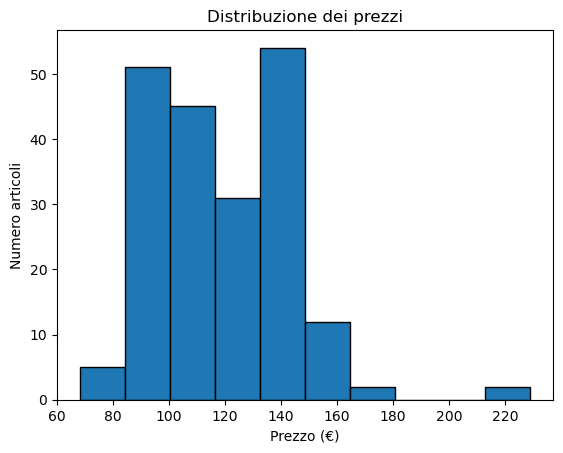

In [547]:
#Distribuzione dei prezzi

import matplotlib.pyplot as plt

plt.hist(df_uomo_donna_nae["prezzo"], bins=10, edgecolor='black')
plt.title("Distribuzione dei prezzi")
plt.xlabel("Prezzo (€)")
plt.ylabel("Numero articoli")
plt.show()


In [549]:
bins = [0, 79.99, 99.99, 119.99, float('inf')]
labels = ["<79,99€", "80–99,99€", "100–119,99€", ">=120€"]

df_uomo_donna_nae["fascia_prezzo"] = pd.cut(df_uomo_donna_nae["prezzo"], bins=bins, labels=labels)


In [551]:
df_uomo_donna_nae["fascia_prezzo"].value_counts(sort=False)

fascia_prezzo
<79,99€         5
80–99,99€      51
100–119,99€    47
>=120€         99
Name: count, dtype: int64

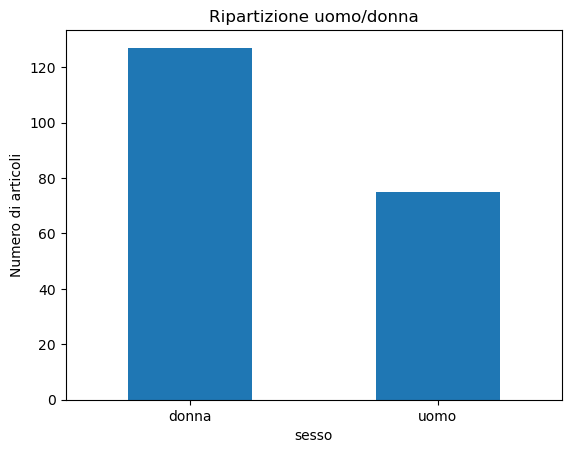

In [553]:
df_uomo_donna_nae["sesso"].value_counts().plot(kind="bar", title="Ripartizione uomo/donna")

plt.xticks(rotation=0)  
plt.ylabel("Numero di articoli")
plt.show()

<Axes: title={'center': 'Articoli per tipologia'}, xlabel='categoria'>

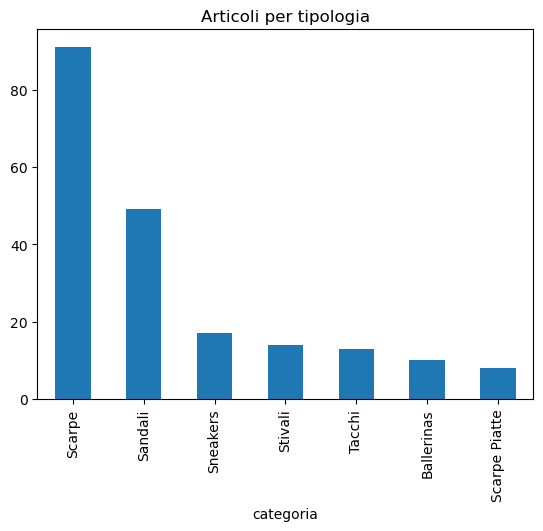

In [555]:
df_uomo_donna_nae["categoria"].value_counts().plot(kind="bar", title="Articoli per tipologia")

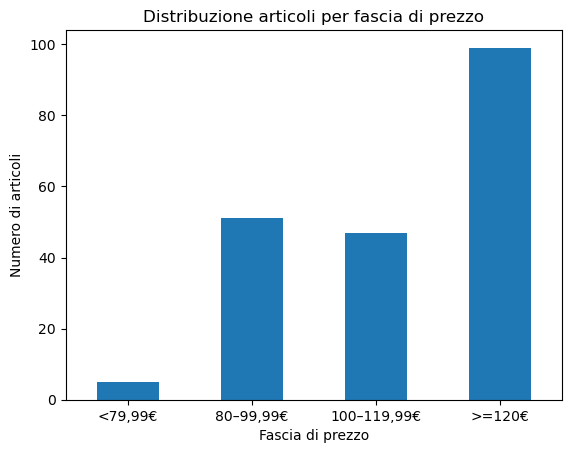

In [557]:
df_uomo_donna_nae["fascia_prezzo"].value_counts(sort=False).plot(kind="bar")
plt.title("Distribuzione articoli per fascia di prezzo")
plt.xticks(rotation=0)  
plt.xlabel("Fascia di prezzo")
plt.ylabel("Numero di articoli")
plt.show()


In [559]:
#Varietà	Quante taglie? Quanti colori?
df_uomo_donna_nae["colore"].value_counts()

colore
Black     90
Brown     32
Green     28
Beige     14
Grey      11
White     11
Red       10
Orange     2
Blue       2
Pink       1
Mila       1
Name: count, dtype: int64

<Axes: xlabel='range taglie'>

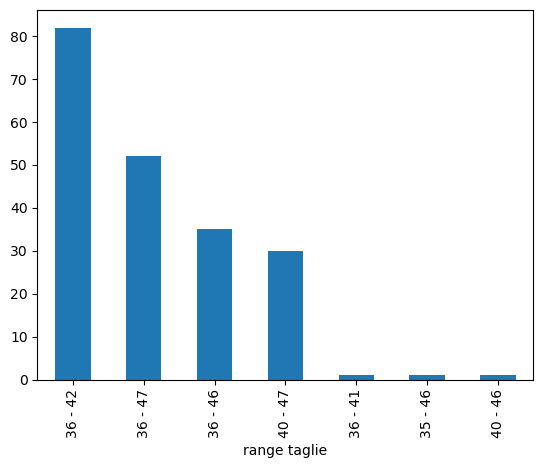

In [575]:
df_uomo_donna_nae["range taglie"].value_counts().plot(kind="bar")
#Distribuzione dei range di taglie